# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [96]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

#### **Data check**

In the first part of exercise 1, the data set is checked for any unsual features.

array([[<AxesSubplot: title={'center': 'avgAnnCount'}>,
        <AxesSubplot: title={'center': 'avgDeathsPerYear'}>,
        <AxesSubplot: title={'center': 'incidenceRate'}>,
        <AxesSubplot: title={'center': 'medIncome'}>,
        <AxesSubplot: title={'center': 'popEst2015'}>,
        <AxesSubplot: title={'center': 'povertyPercent'}>],
       [<AxesSubplot: title={'center': 'studyPerCap'}>,
        <AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'MedianAgeMale'}>,
        <AxesSubplot: title={'center': 'MedianAgeFemale'}>,
        <AxesSubplot: title={'center': 'AvgHouseholdSize'}>,
        <AxesSubplot: title={'center': 'PercentMarried'}>],
       [<AxesSubplot: title={'center': 'PctNoHS18_24'}>,
        <AxesSubplot: title={'center': 'PctHS18_24'}>,
        <AxesSubplot: title={'center': 'PctSomeCol18_24'}>,
        <AxesSubplot: title={'center': 'PctBachDeg18_24'}>,
        <AxesSubplot: title={'center': 'PctHS25_Over'}>,
        <AxesSubpl

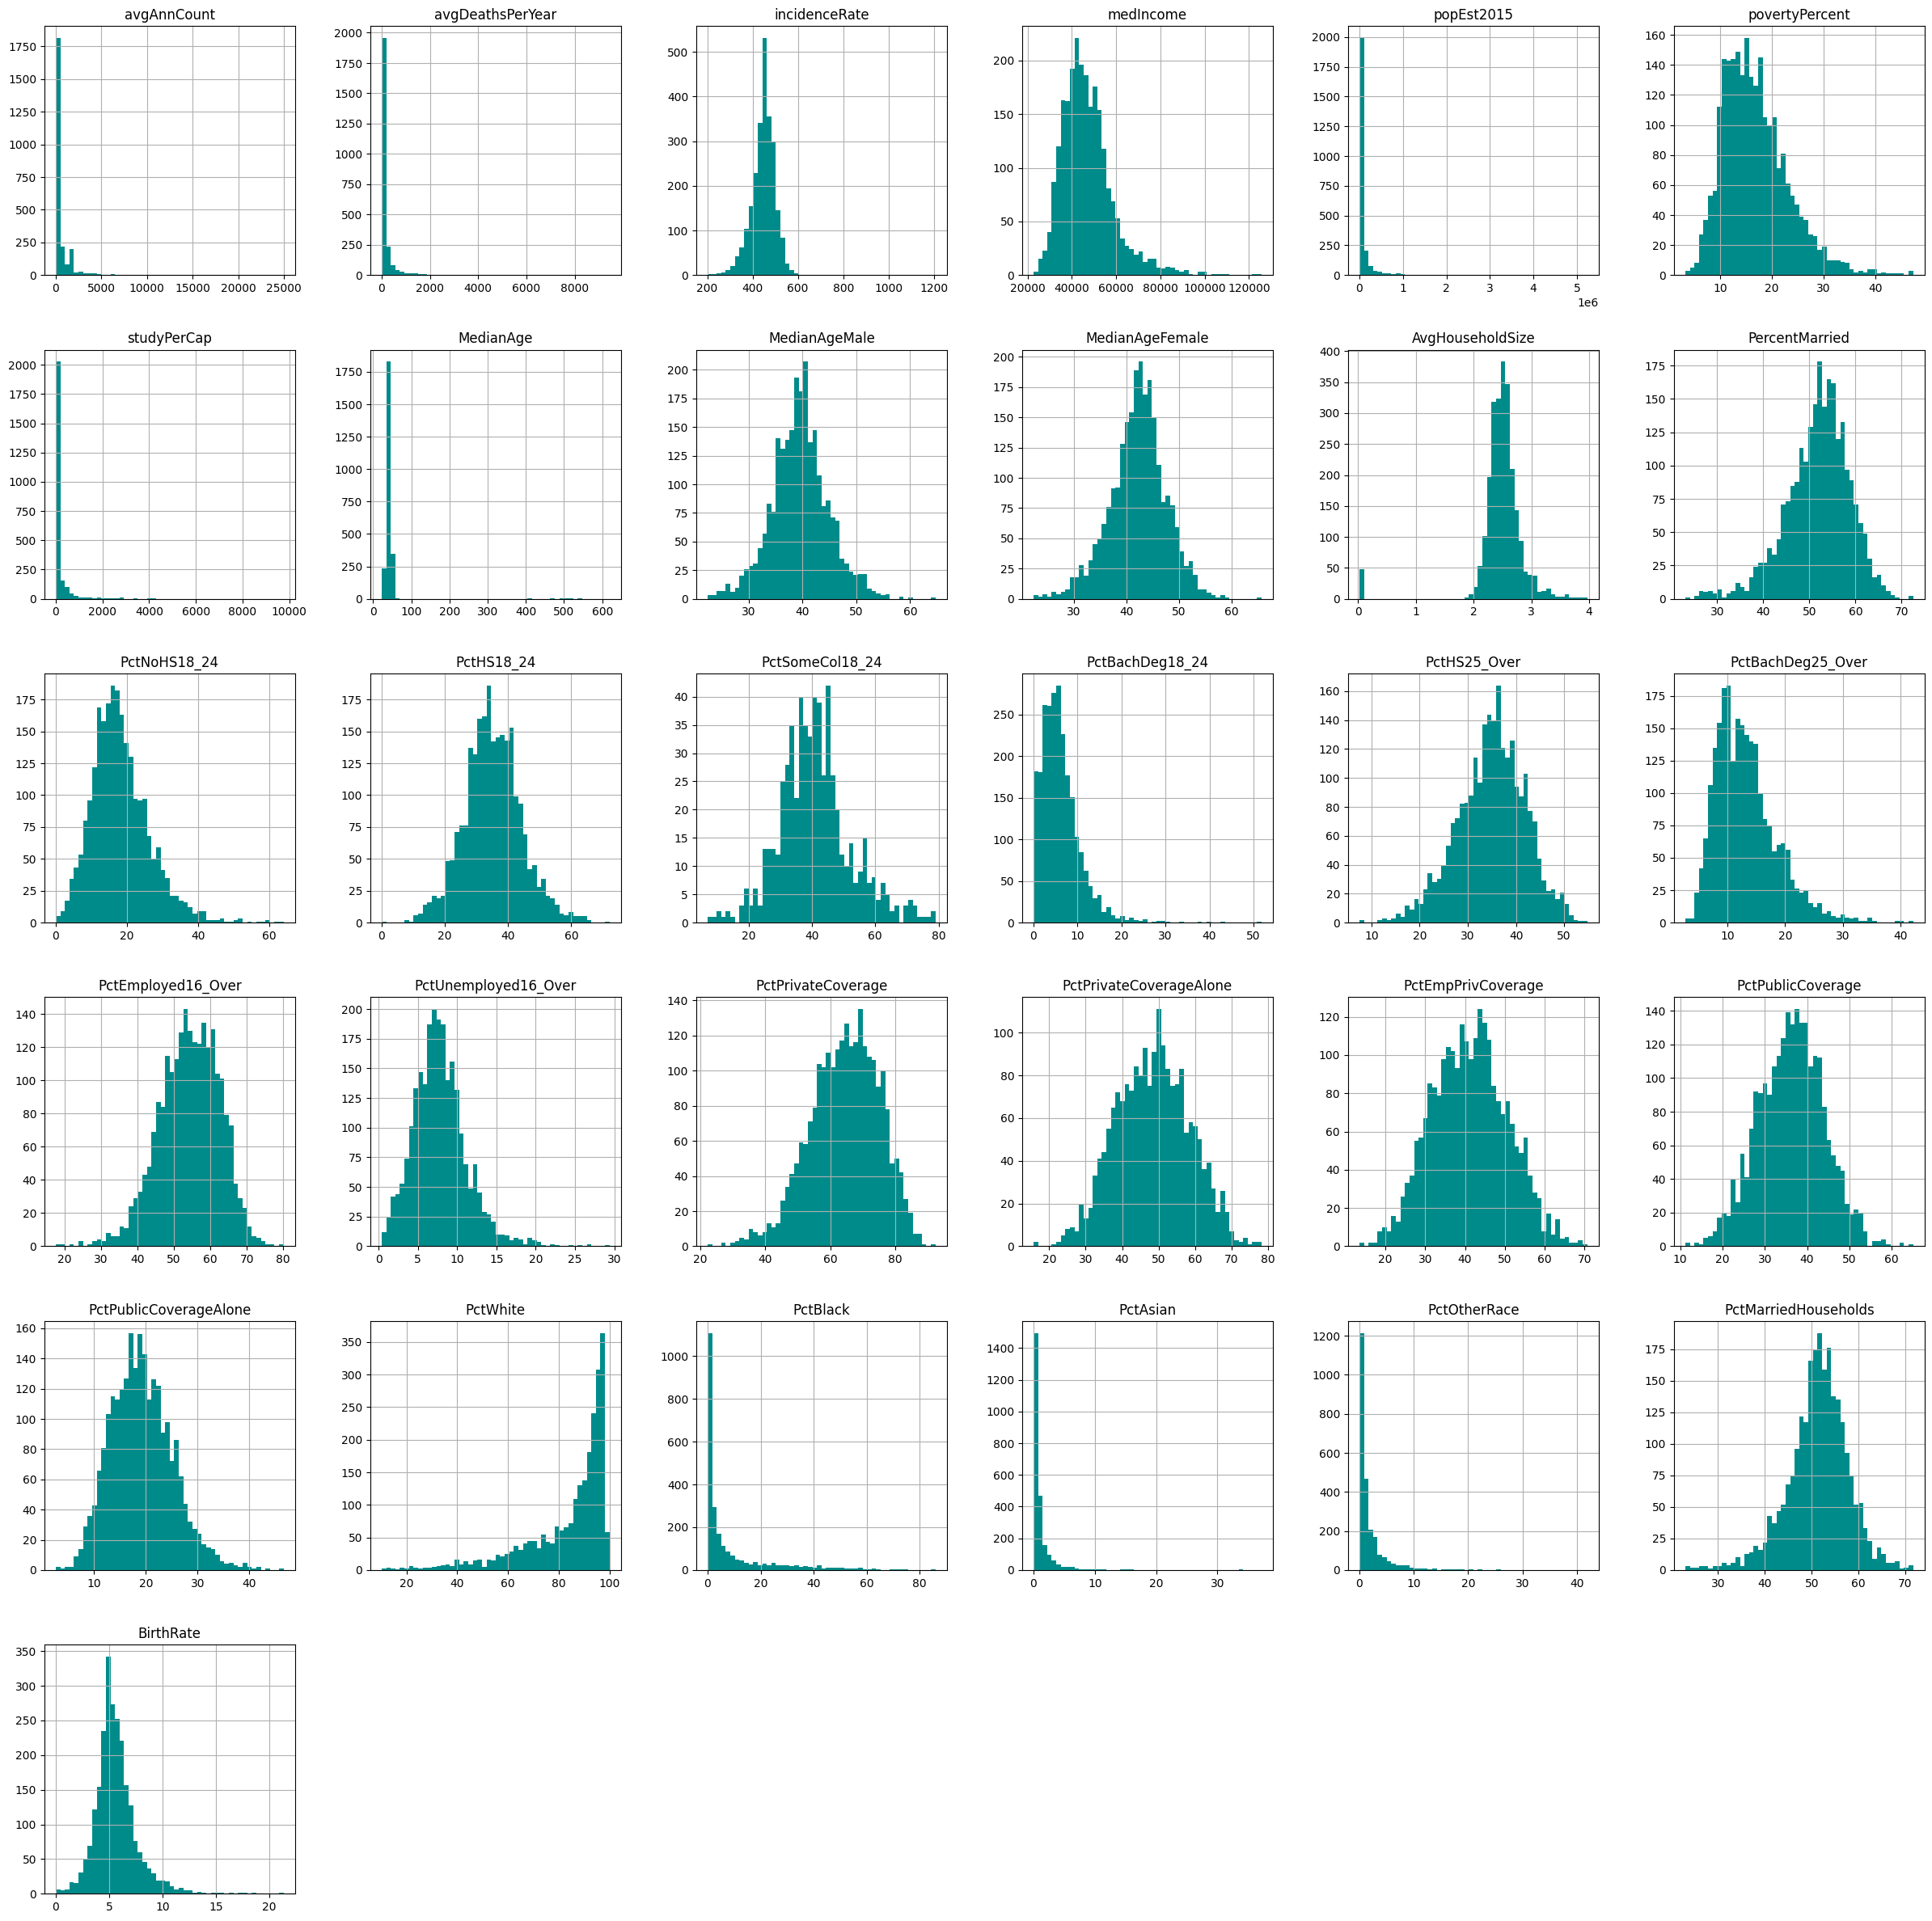

In [97]:
# Plot histograms to visualize all data
%matplotlib inline
plot_color = 'darkcyan'
cancer_data = pd.read_csv(training_data_path)
cancer_data.hist(bins=50,figsize=(30,30), color=plot_color)

In [160]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


array([[<AxesSubplot: title={'center': 'TARGET_deathRate'}>]],
      dtype=object)

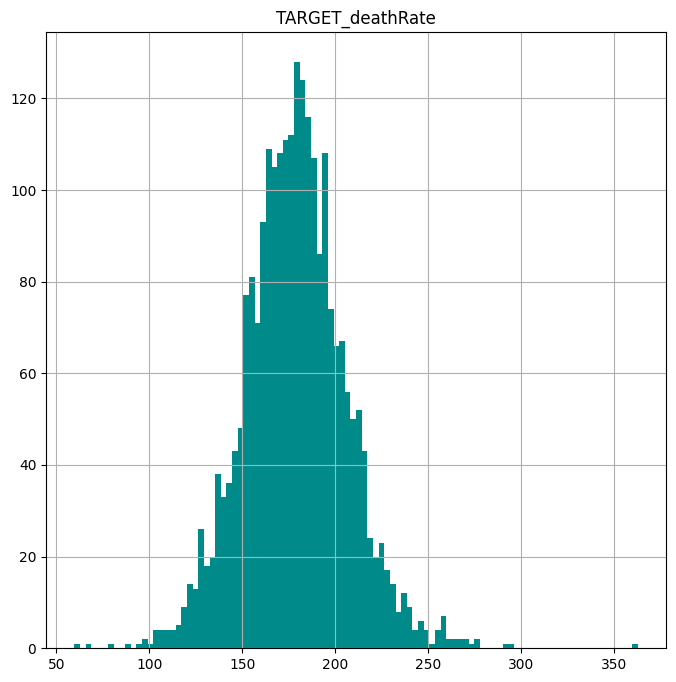

In [98]:
target = "TARGET_deathRate"
target_data = pd.read_csv(training_targets_path)
target_data.hist(bins=100,figsize=(8,8), color=plot_color)

In [99]:
# Further checks
from tabulate import tabulate

data_table = []
head = ["Column name", "Mean", "Standard deviation", "#entries>3std", "#entries<3std", "#entries>5std", "#entries<5std"]

# Find entries that are outside of the standard deviation
for column in cancer_data:
    mean = cancer_data[column].mean()
    std = cancer_data[column].std()
    count_above_std3 = 0
    count_below_std3 = 0
    count_above_std5 = 0
    count_below_std5 = 0

    for entry in cancer_data[column]:
        if entry < mean - std*3:
            count_below_std3 += 1
        elif entry > mean + std*3:
            count_above_std3 += 1

        if entry < mean - std*5:
            count_below_std5 += 1
        elif entry > mean + std*5:
            count_above_std5 += 1

    data_table.append([column, mean, std, count_above_std3, count_below_std3, count_above_std5, count_below_std5]) # add data for every column

print(tabulate(data_table, headers=head, tablefmt="grid"))

+-------------------------+--------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| Column name             |         Mean |   Standard deviation |   #entries>3std |   #entries<3std |   #entries>5std |   #entries<5std |
+=========================+==============+======================+=================+=================+=================+=================+
| avgAnnCount             |    598.333   |          1288.68     |              36 |               0 |              18 |               0 |
+-------------------------+--------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| avgDeathsPerYear        |    183.717   |           456.439    |              43 |               0 |              20 |               0 |
+-------------------------+--------------+----------------------+-----------------+-----------------+-----------------+-----------------+
| incidenceRate           |    447

In [100]:
# Incorrect data
count_entries_above66 = 0

for entry in cancer_data['MedianAge']:
    if entry > 66:
        count_entries_above66 += 1

print('The total number of entries above 66 years in MedianAge is', count_entries_above66)

The total number of entries above 66 years in MedianAge is 26


<AxesSubplot: >

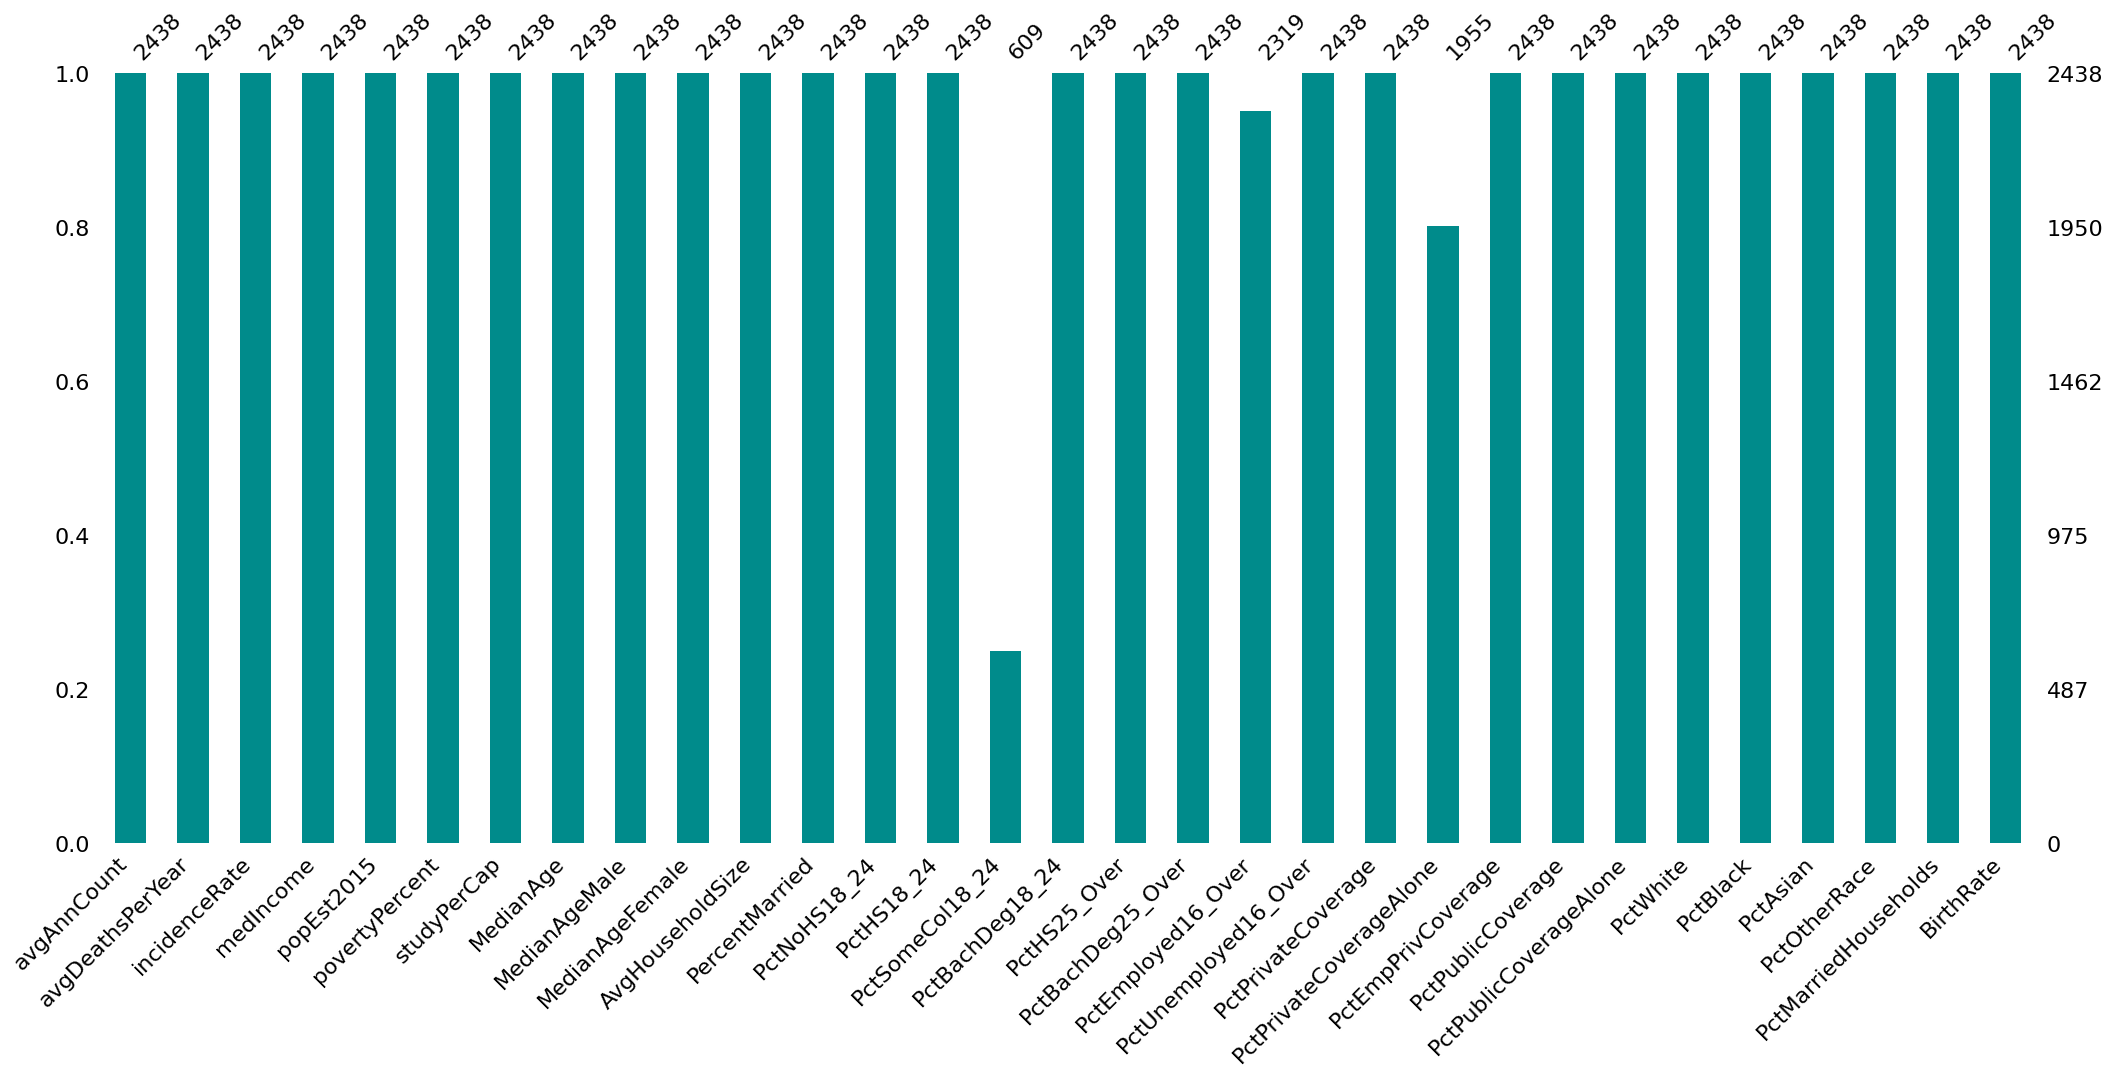

In [101]:
# Missing data
import missingno as msno
msno.bar(cancer_data, color=plot_color)

<AxesSubplot: >

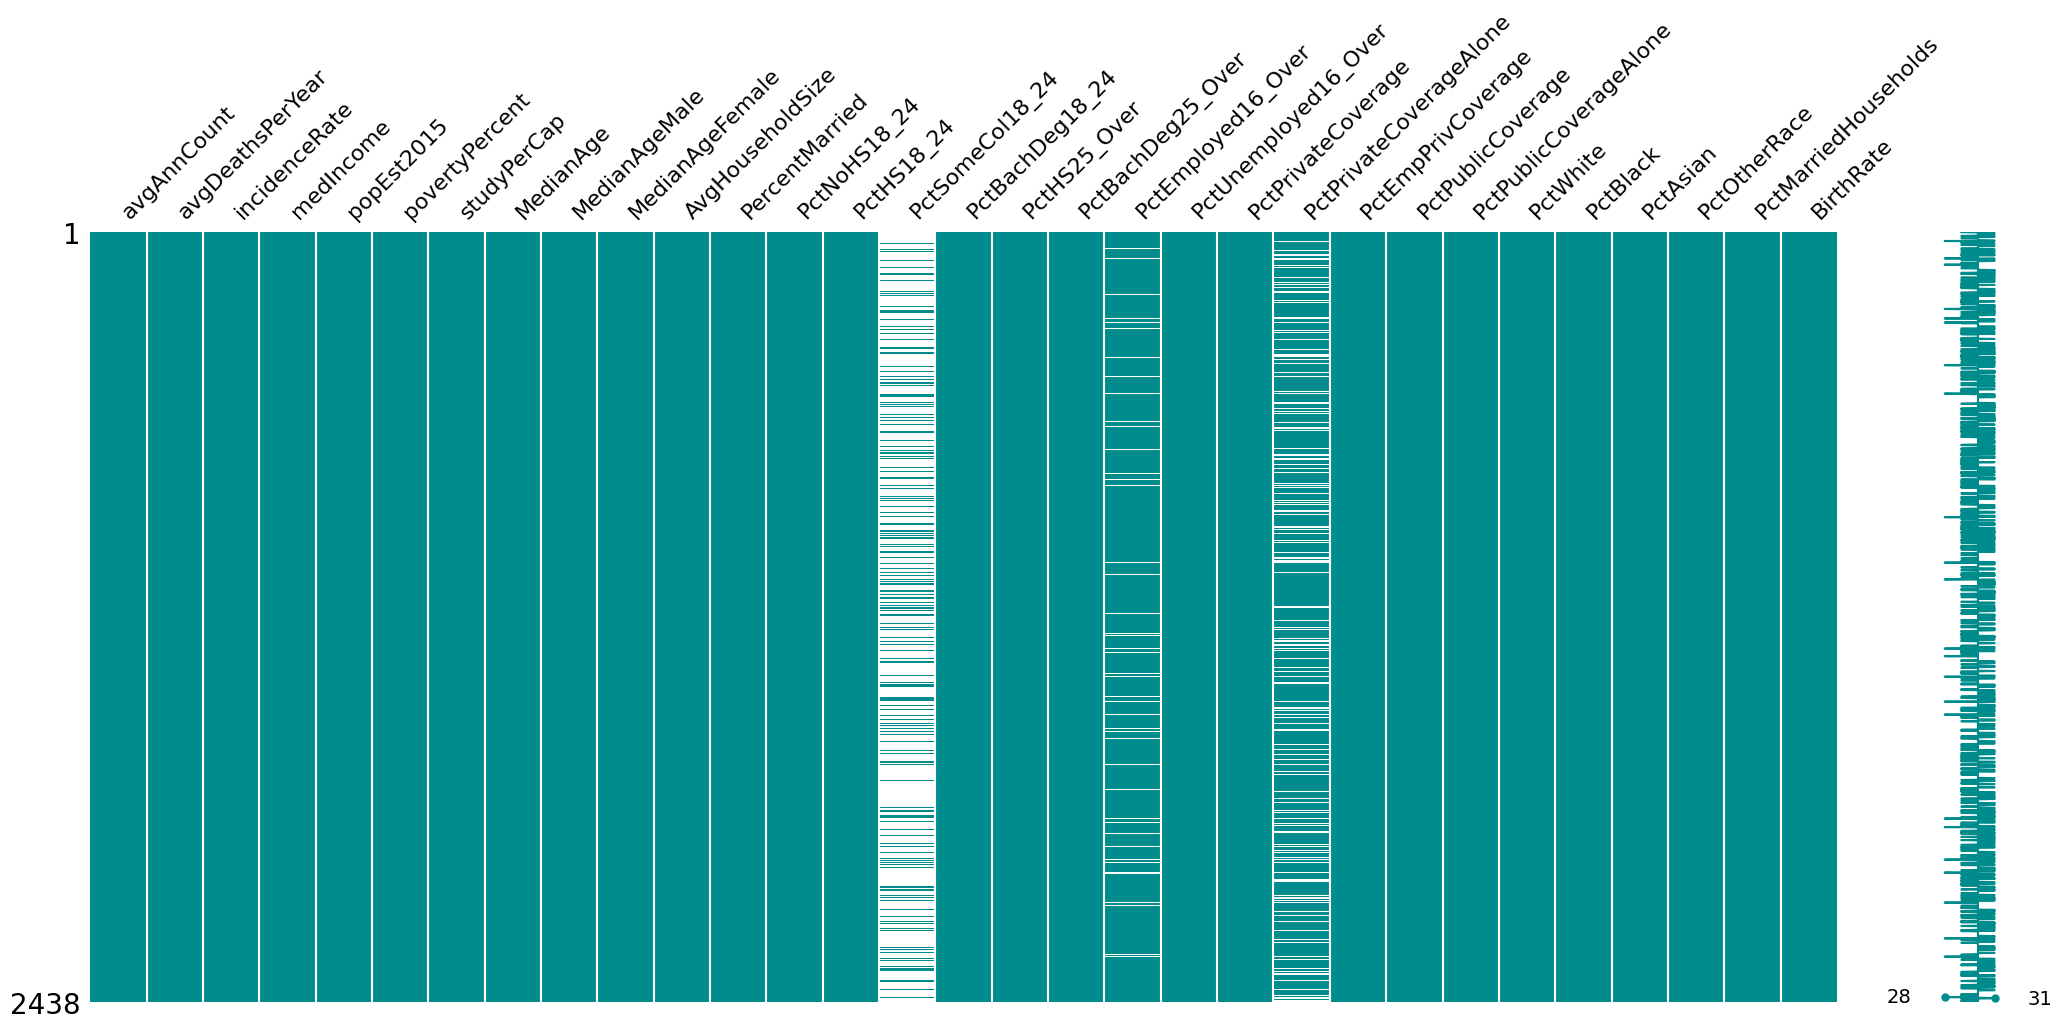

In [102]:
msno.matrix(cancer_data, color=(0, 0.55, 0.55)) # check if missing data is random across the set

There are a few columns that contain unusual data:
- The highest median age for male is 64.7, and the highest medial age for female population is 65.7. In the 'MedianAge' column there are 26 entries that are above 66 years, all of them being in the 100th scale. These entries are clearly a mistake and they should be replaced;
- In an usual Gaussian Distribution, data that is outside of 3 standard deviations is very rare and, therefore, can be replaced from the machine learning pipeline. In this exercise, due to the data size limitation, only values that are above or below 5 std will be replaced:
  - The AvgHouseholdSize has 48 entries that are below 5 standard deviation;
  - A few entries for PctNoHS18_24 (3), PctBachDeg18_24 (8), PctBachDeg25_Over (3), PctUnemployed16_Over (4);
  - The other categories that show high standard deviations are PctBlack, PctAsian and PctOtherRace, but they are not Gaussian distributed.
  

Most columns have 2438 entries, but some do not:

- PctSomeCol18_24 has null values in 1829 positions out of 2438. It was decided to remove the column from the pipeline because:
  - A low percentage (24.98%) of the entries have a value;
  - It is poorly correlated to the target data. It has a correlation of 0.19 and additional data would not improve this number.


- PctEmployed16_Over has null values in 119 positions out of 2438. It was decided to keep the column and replace the missing data because:
  - A high percentage (95.12%) of the entries have a value;
  - It is a Gaussian distribution, with missing values at random locations. This allows us to replace the nan values with gaussian distributed data;
  - It has a high correlation with the target values (0.40).


- PctPrivateCoverageAlone has null values in 483 positions out of 2438. It was decided to keep the column and replace the missing data because:
  - A high percentage (80.11%) of the entries have a value;
  - PctPrivateCoverageAlone has a high correlation with the target data (0.36) compared to most of the other categories;
  - It is a Gaussian distribution, with missing values at random locations. This allows us to replace the nan values with gaussian distributed data.

#### **Correlation**
In the second part of the excercise, the correlation is checked between the target value and the rest of the data set. 

Correlation of PctBachDeg25_Over with the target value is -0.491 | Slope of the graph -0.197
Correlation of incidenceRate with the target value is 0.444 | Slope of the graph 0.573
Correlation of PctPublicCoverageAlone with the target value is 0.44 | Slope of the graph 0.203
Correlation of medIncome with the target value is -0.417 | Slope of the graph -0.285
Correlation of povertyPercent with the target value is 0.413 | Slope of the graph 0.171


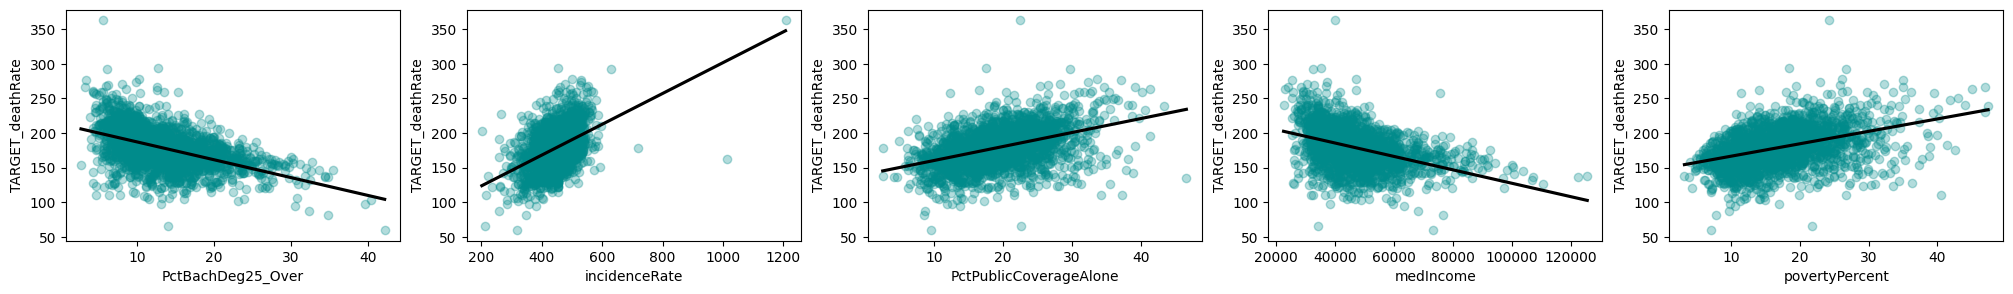

In [198]:
import seaborn as sns

# Check correlation
full_data = cancer_data.copy()
full_data.insert(1, target, target_data)

corr_matrix=full_data.corr()
correlation = corr_matrix[target] 
high_correclation = correlation.sort_values(ascending=False, key=abs)[1:6].index # get the abs highest 5 values

# Create plots
incr = 0
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 3))

for feature in high_correclation:
   sns.regplot(x=full_data[feature], y=full_data[target], data=full_data, scatter_kws={'color': plot_color, 'alpha':0.3}, line_kws={'color': 'black'}, ci=None, ax=axes[incr])
   incr += 1
   print('Correlation of', feature, 'with the target value is', round(correlation[feature],3), '| Slope of the graph', round(np.polyfit(np.log(full_data[feature]), np.log(full_data[target]), 1)[0],3))

In the tables above, the first five best linear correlations can be observed. It can be seen how the cancer average death rate is associated in a positive ('incidentRate', 'PctPublicCoverageAlone', 'povertyPercent') or negative ('PctBachDeg25_Over', 'medIncome') way to these values. 

The 'medIncome' has a negative linear correlation of approximately -0.42 with the target death rate, meaning that counties with higher incomes tend to have lower numbers of cancer deaths. Higher income counties are more likely to have advanced medical institutions that can identify and treat cancer cases faster. It is known that death from certain cancer types may be avoided if there is treatment in the early stages of the disease. As a result, the scatter plot of the 'medIncome' shows how te number of deaths due to cancer gets smaller as the income increases. The correlation is not exactly proportional as the slope of the linear regression model fit by seaborn is around -28.5°; this implies that cases of cancer do not drop linearly with the income of the county. 

The 'incidenceRate' has a fairly high positive linear correlation to the target data (0.44). This is expected because a larger number of diagnosed cases causes higher numbers of deaths due to cancer. It can be seen that the slop of of the linear regression model fit by seaborn is approximately 57.3°. This indicates that the death date is almost directly proportional to the incident rate. 

In the section below, scatter plots were created for all the features in the dataset. These plots can show how the target data can, actually, have a lower/higher colerration with certain features if outliers are removed. This is something that has to be considered in the machine learning pipeline. For example, 'PctPrivateCoverageAlone' has a fairly high negative correlation of -0.36 with the target data that can occur due to its outliers. This feature will have a lower correlation because entries with high deviations should be replaced from the data used in the pipeline. It will be interesting to observe if its weight is smaller compared to weights from other features that currently have lower absolute correlations.  

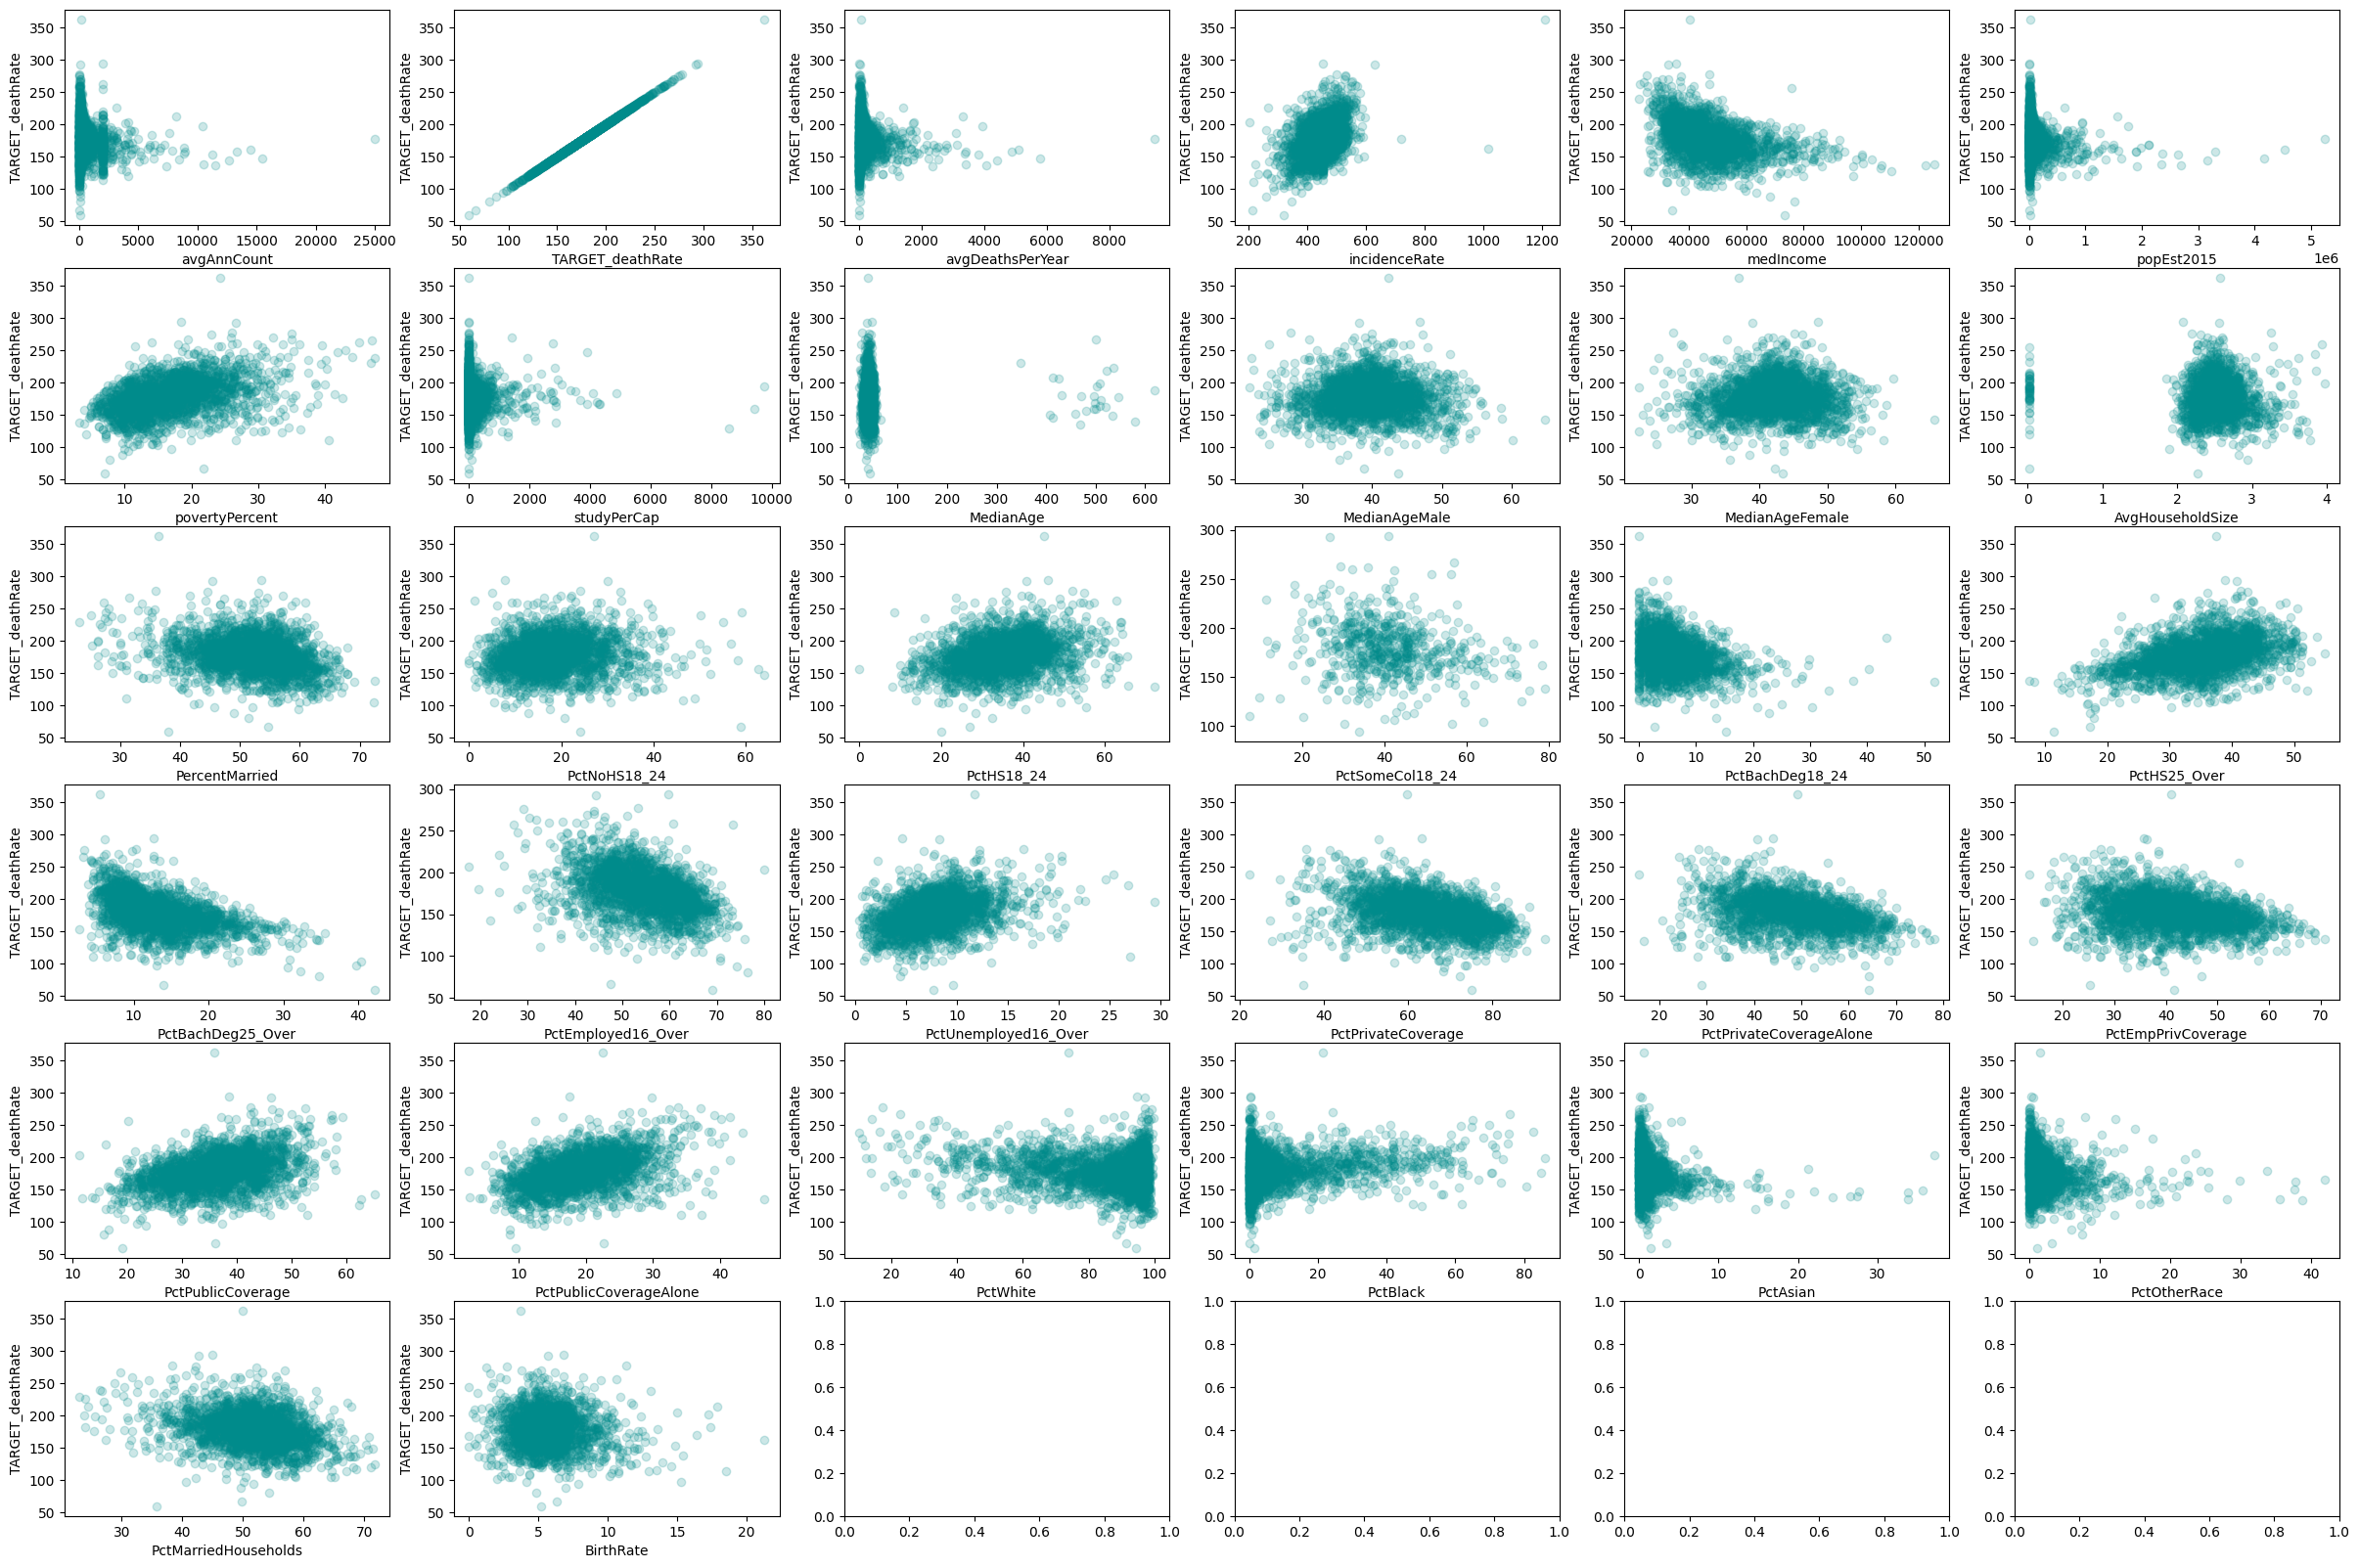

In [180]:
incr_1 = 0
incr_2 = 0

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 20))

for feature in full_data:
   axes[incr_1][incr_2].scatter(x=full_data[feature], y=full_data[target].values, alpha=0.2, color=plot_color)
   axes[incr_1][incr_2].set_xlabel(feature)
   axes[incr_1][incr_2].set_ylabel(target)
   if (incr_2 + 1) < 6:
      incr_2 += 1
   else:
      incr_2 = 0
      incr_1 += 1

In [196]:
corr_matrix[target].sort_values(ascending=False, key=abs)

TARGET_deathRate           1.000000
PctBachDeg25_Over         -0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                 -0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over        -0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage        -0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone   -0.355050
PctMarriedHouseholds      -0.290645
PctBachDeg18_24           -0.284566
PctHS18_24                 0.266285
PercentMarried            -0.266153
PctEmpPrivCoverage        -0.259006
PctBlack                   0.236380
PctSomeCol18_24           -0.186140
PctOtherRace              -0.182602
PctAsian                  -0.181948
PctWhite                  -0.174521
avgAnnCount               -0.150019
popEst2015                -0.130122
avgDeathsPerYear          -0.094048
PctNoHS18_24               0.090565
BirthRate                 -0.088543
AvgHouseholdSize          -0

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [178]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

def preprocess(data, target):
    drop(data)
    replace_high_std(data)
    X_train, X_test, y_train, y_test = split_data(data, target)
    return X_train, X_test, y_train, y_test


# Drop columns that miss more than half of the total number of entries
def drop(data):
        data_len = len(data.axes[0])

        for column in data:
            if data[column].isnull().any():
                if data[column].notnull().sum() < (data_len/2):
                    data = data.drop(column,axis=1)


# Replace data that is at five std
def replace_high_std(data):
    for column in data:
            mean = data[column].mean()
            std = data[column].std()
            
            for entry in data[column]:
                if ((mean - std*5) >= entry) or ((mean + std*5) <= entry ):
                    entry = mean


def split_data(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=42) # 70%-30% split between train and test
    return X_train, X_test, y_train, y_test


In [181]:
#full_data = cancer_data[high_correclation].copy()
full_data = cancer_data.copy()
full_data.insert(1, target, target_data)

data_train, data_test, target_train, target_test = preprocess(cancer_data, target_data)

# Return contiguous arrays
target_train = target_train.values.ravel()
target_test = target_test.values.ravel()

In [182]:
from sklearn.base import BaseEstimator

class SelectAttributes(BaseEstimator):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('slc_attribs', SelectAttributes(list[data_train])),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [201]:
cancer_prepared = pipeline.fit_transform(data_train)

cancer_prepared

array([[-0.13630869, -0.01861111,  0.46014569, ..., -0.42042876,
         0.14717833,  0.04386536],
       [-0.25064721, -0.1660058 ,  0.18057432, ..., -0.49411108,
         0.39651027, -0.76999926],
       [-0.28594635, -0.20285447,  1.00990685, ..., -0.48552413,
        -0.95116495, -1.26186849],
       ...,
       [ 0.27960725,  0.49510275,  0.5239405 , ..., -0.24908007,
        -4.14592336, -0.37731033],
       [ 1.05823541,  1.34045466,  0.11395419, ..., -0.31278084,
         0.63828187, -0.05262316],
       [-0.43942086, -0.37625999, -2.88720549, ..., -0.58033558,
         1.04295846,  4.01634692]])

Exercise 2 focuses on the filtering of the data. Firstly, based on the analysis perform for exercise 1, columns are dropped when required, high standard deviation entries are removed and data is split between test and train. Secondly, the filtered data is then passed through the pipeline in order to impute any missing values and scale the data set. Scaling is important because different machine learning models are sensitive to the range of the data points. It is better to keep all of the values on the same scale so that the weights are not affected. 

The median value is used for the imputer as it is the standard strategy used for Gaussian processes. After checking the data in exercise 1, all of the features that need imputation are Gaussian distributed.

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [186]:
from sklearn.metrics import mean_squared_error

def display_error(model, data, target): 
    predictions = model.predict(data)
    mse=mean_squared_error(target, predictions)
    rms=np.sqrt(mse)
    rs = model.score(data, target)

    print('Root square error:', rs)             # based on R^2
    print('Root mean square error:', rms)       # based on RMSE

In [187]:
# OLS model
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(cancer_prepared, target_train)

display_error(lin_reg, cancer_prepared, target_train)

Root square error: 0.5268269013913225
Root mean square error: 18.97697178553417


L1 Regularization:
$$
L(w) = {\frac{1}{2n}} \sum^n_{i=1} (y_i - Xw)^2 + \alpha \sum^n_{j=1} w
$$

In [188]:
from sklearn.linear_model import LassoCV

lasso = LassoCV() # Lasso Cross validation
lasso.fit(cancer_prepared, target_train)

display_error(lasso, cancer_prepared, target_train)
print('Best alpha:', lasso.alpha_)    

best_lasso_alpha = lasso.alpha_

Root square error: 0.5250815144076457
Root mean square error: 19.0119396139404
Best alpha: 0.06678430462679165


L2 Regularization:
$$
L(w) = \sum^n_{i=1} (y_i - Xw)^2 + \alpha w^2
$$

In [189]:
# Ridge model
from sklearn.linear_model import RidgeCV

ridge = RidgeCV() # Ridge Cross validation
ridge.fit(cancer_prepared, target_train)

display_error(ridge, cancer_prepared, target_train)
print('Best alpha:', ridge.alpha_)    

Root square error: 0.526489562846983
Root mean square error: 18.98373519144358
Best alpha: 10.0


In the exercise, a linear, lasso and ridge regression models were fit to the cancer data and compared against the scores for the root squared error and the root mean square error.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

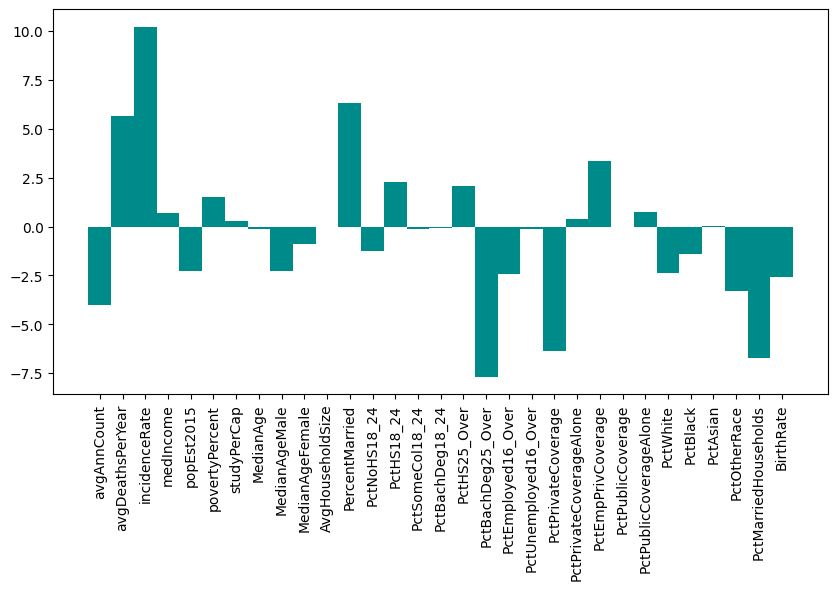

In [116]:
x = list(data_train.columns)
y = list(lasso.coef_)

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, width = 1, color = plot_color)
plt.xticks(rotation='vertical')
plt.show()

In [195]:
comparison_table = []
comparison_head = ["Fields", "Initial Correlation", "Lasso Weights"]
weights = pd.Series(y, x)

for field in x:
    comparison_table.append([field, correlation[field], weights[field]])

#table = sorted(comparison_table, key=lambda k: float(k[2]), reverse=True)

table = comparison_table.sort_values(ascending=False, key=abs)

print(tabulate(table, headers=comparison_head, tablefmt="grid"))

+-------------------------+-----------------------+-----------------+
| Fields                  |   Initial Correlation |   Lasso Weights |
+=========================+=======================+=================+
| incidenceRate           |           0.443983    |     10.2092     |
+-------------------------+-----------------------+-----------------+
| PercentMarried          |          -0.266153    |      6.33816    |
+-------------------------+-----------------------+-----------------+
| avgDeathsPerYear        |          -0.0940476   |      5.63858    |
+-------------------------+-----------------------+-----------------+
| PctEmpPrivCoverage      |          -0.259006    |      3.33503    |
+-------------------------+-----------------------+-----------------+
| PctHS18_24              |           0.266285    |      2.27471    |
+-------------------------+-----------------------+-----------------+
| PctHS25_Over            |           0.409915    |      2.08566    |
+-------------------

In [118]:
highest_weights = weights.abs().sort_values(ascending=False)[1:6].index

print(highest_weights)
print(high_correclation)

Index(['PctBachDeg25_Over', 'PctMarriedHouseholds', 'PctPrivateCoverage',
       'PercentMarried', 'avgDeathsPerYear'],
      dtype='object')
Index(['PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone',
       'medIncome', 'povertyPercent'],
      dtype='object')


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

#### **Create a Random Forest Regression model**

In order to get the best outcome from the random forest, the hyperparameters have to be tuned using some kind of cross validation method. For the first part of the exercise, a Random forest that uses default settings will be compared against a random forest that is subjected to a grid serch cross validation.

In order to minise the time complexity of the model, a randomized grid search is used to restrict the parameter range. A small range around the results will then be fed into a grid search. The scored estimates will them be compared so that the numbers of estimates/depth/features will be reduced in case the accuracy is not higher. 

In [202]:
# Default Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg=RandomForestRegressor()
forest_reg.fit(cancer_prepared, target_train)

cancer_predictions_forest=forest_reg.predict(cancer_prepared)
forest_mse = mean_squared_error(target_train, cancer_predictions_forest)
forest_rsme=np.sqrt(forest_mse)
print('Root mean square error is', forest_rsme)

scores=cross_val_score(forest_reg, cancer_prepared, target_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-scores)

print('Scores:', forest_rmse_scores)
print('Mean:', forest_rmse_scores.mean())
print('Standard deviation:', forest_rmse_scores.std())

Root mean square error is 7.142894786118357
Scores: [19.61042442 20.33335367 16.48122774 18.21456764 19.8066123  19.86683609
 18.22708781 19.55018288 17.98079466 18.6539834 ]
Mean: 18.8725070630095
Standard deviation: 1.1139862142188102


In the first instance, fit the regression model to a randomized grid search so that the ranges of the hyperparameters values can be reduced. 

In [206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

init_param_grid = { 
    'n_estimators': [int(x) for x in range(1, 100)],
    'max_features': [int(x) for x in range(1, 10)],
    'max_depth' : [int(x) for x in np.linspace(1, 110, num = 10)],
    'min_samples_split': [int(x) for x in range(2, 10)],
    'bootstrap': [True, False]
}

forest_reg = RandomForestRegressor()

# n_iter: number of folds to use for cross validation
grid_search_random = RandomizedSearchCV(forest_reg, init_param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
grid_search_random.fit(cancer_prepared, target_train)

grid_search_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 90,
 'min_samples_split': 4,
 'max_features': 8,
 'max_depth': 73,
 'bootstrap': False}

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {}

for parameter in init_param_grid:
    value = grid_search_random.best_params_[parameter]

    if type(value) is int:
        if value > 20:
            param_grid[parameter] = [int(x) for x in np.linspace(value - 10, value + 10, 5)]
        else:
            param_grid[parameter] = [int(x) for x in np.linspace(value - 2, value + 2, 3)]
    else:
        param_grid[parameter] = [value]


grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(cancer_prepared, target_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False],
                         'max_depth': [63, 68, 73, 78, 83],
                         'max_features': [6, 8, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [80, 85, 90, 95, 100]},
             scoring='neg_mean_squared_error')

In [208]:
tuned_params = {}

for parameter in grid_search.best_params_:
    tuned_params[parameter] = [grid_search.best_params_[parameter]]

In [209]:
tuned_params

{'bootstrap': [False],
 'max_depth': [63],
 'max_features': [10],
 'min_samples_split': [4],
 'n_estimators': [85]}

#### **Compare model weights**

Firstly, create a table that compared the weights from the lasso model and the random regression forest.

In [53]:
model_regression_table = []
model_regression_head = ["Weight Name", "Lasso Weight", "Random Forest Weight"]

for i in range(data_train.columns.size):
    model_regression_table.append([data_train.columns[i], lasso.coef_[i], grid_search.best_estimator_.feature_importances_[i]])

print(tabulate(model_regression_table, headers=model_regression_head, tablefmt="grid"))

+-------------------------+----------------+------------------------+
| Weight Name             |   Lasso Weight |   Random Forest Weight |
+=========================+================+========================+
| avgAnnCount             |    -4.01378    |             0.0231013  |
+-------------------------+----------------+------------------------+
| avgDeathsPerYear        |     5.63858    |             0.0438342  |
+-------------------------+----------------+------------------------+
| incidenceRate           |    10.2092     |             0.168982   |
+-------------------------+----------------+------------------------+
| medIncome               |     0.704011   |             0.079692   |
+-------------------------+----------------+------------------------+
| popEst2015              |    -2.26287    |             0.0226331  |
+-------------------------+----------------+------------------------+
| povertyPercent          |     1.49655    |             0.0398408  |
+-------------------

#### **Comment on the most important features**

In [54]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = list(cancer_data)
forest_features = sorted(zip(feature_importances, attributes),reverse=True)

It can be noticed that the hightest weight in the Random forest are:
- incidenceRate (0.163)
- PctBachDeg25_Over (0.134)
- medIncome (0.066)
- PctHS25_Over (0.059)
- PctPublicCoverageAlone (0.053)

In contrast, it can be noticed that the hightest weight in the Lasso are:
- incidenceRate (10.209)
- PctBachDeg25_Over (-7.680)
- PctMarriedHouseholds (-6.710)
- PctPrivateCoverage (-6.384)
- PercentMarried (6.338)

It can be seen that the first two features are the same for both models. 'incidenceRate' and 'PctBachDeg25_Over' also had a high correlation on the initial dataset, so it makes sense for them to have a higher weight in the process.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [102]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

test_prepared = pipeline.fit_transform(test_data)

model = RandomForestRegressor()
grid = GridSearchCV(model, tuned_params, cv=5, scoring='neg_mean_squared_error')
grid.fit(cancer_prepared, target_train)

predictions = grid.predict(test_prepared)

errors = []
m = []
for i in range(len(predictions) - 1):
    difference = predictions[i] - test_targets.values[i]
    errors.append(abs(difference))
    m.append(abs(difference) / test_targets.values[i])

#errors = abs(predictions - test_targets.to_numpy())
mape = 100 * np.mean(m)
accuracy = 100 - mape
print('Model Performance:')
print('Average Error: {:0.4f}.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance:
Average Error: 14.5042.
Accuracy = 91.98%.
